## Model selection

Build ML pipelines and through cross-validation and assessment choose a model that performs the best

### Import libraries

In [65]:
## Pandas
import pandas as pd
## Split into train/test datasets
from sklearn.model_selection import train_test_split
## Construct model pipelines
from sklearn.pipeline import make_pipeline
## Models
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
## Scale input features
from sklearn.preprocessing import StandardScaler
## Cross-validation loop
from sklearn.model_selection import GridSearchCV
## Performance assessment
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score
## Matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

### Load datasets

In [8]:
df_red = pd.read_csv('winequality-red.csv', index_col=0, delimiter=';')
df_white = pd.read_csv('winequality-white.csv', index_col=0, delimiter=';')

### Split dataset

In [45]:
red_quality = df_red.quality
red_input_features = df_red.drop('quality', axis=1)
red_input_train, red_input_test, red_quality_train, red_quality_test = train_test_split(
    red_input_features, red_quality, test_size=0.2, random_state=123)

white_quality = df_white.quality
white_input_features = df_white.drop('quality', axis=1)
white_input_train, white_input_test, white_quality_train, white_quality_test = train_test_split(
    white_input_features, white_quality, test_size=0.2, random_state=123)

In [44]:
## Make sure the 'quality' column is not present
red_input_features.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,,,,,,,,,,
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [47]:
## Make sure the 'quality' column is not present
white_input_features.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,,,,,,,,,,
7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


### Create pipelines and declare hyperparameters

In [59]:
pipelines = {
    'lasso': make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge': make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet': make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf': make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

hyperparameters = {
    'lasso': {
        'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
    },
    'ridge': {
        'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
    },
    'enet': {
        'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
        'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
    },
    'rf': {
        'randomforestregressor__n_estimators': [100, 200],
        'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]
    },
    'gb': {
        'gradientboostingregressor__n_estimators': [100, 200],
        'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
        'gradientboostingregressor__max_depth': [1, 3, 5]
    }
}

### Run cross-validation loops and train models

In [60]:
def fit_models(X_train, y_train):
    # Create empty dictionary called fitted_models
    fitted_models = {}

    # Loop through model pipelines, tuning each one and saving it to fitted_models
    for name, pipeline in pipelines.items():
        # Create cross-validation object from pipeline and hyperparameters
        fitted_models[name] = GridSearchCV(pipelines[name], hyperparameters[name], cv=10, n_jobs=-1)

        # Fit model on X_train, y_train
        fitted_models[name].fit(X_train, y_train)

        # Print '{name} has been fitted'
        print(name, 'has been fitted.')

    return fitted_models

In [61]:
fitted_red_models = fit_models(red_input_train, red_quality_train)

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [51]:
fitted_white_models = fit_models(white_input_train, white_quality_train)

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


### Evaluate performance and choose the winner

Higher R^2 score and lower MAE is better.

In [62]:
## Display best R^2 holdout score (red)
for name, model in fitted_red_models.items():
    print(name, model.best_score_)

lasso 0.340473178192
ridge 0.338261204008
enet 0.340276805875
rf 0.469882446628
gb 0.405732354021


In [53]:
## Display best R^2 holdout score (red)
for name, model in fitted_white_models.items():
    print(name, model.best_score_)

lasso 0.263777137078
ridge 0.263725910305
enet 0.263878296412
rf 0.523889580533
gb 0.476010875276


In [54]:
def evaluate_perf(fitted_models, X_test, y_test):
    for name in fitted_models.keys():
        print(name)
        print('--------')
        pred = fitted_models[name].predict(X_test)
        print('R^2:', r2_score(y_test, pred))
        print('MAE:', mean_absolute_error(y_test, pred))
        print()

In [63]:
## Evaluate performance of score prediction for reds
evaluate_perf(fitted_red_models, red_input_test, red_quality_test)

lasso
--------
R^2: 0.333617187356
MAE: 0.538918854695

ridge
--------
R^2: 0.341753123686
MAE: 0.534600976629

enet
--------
R^2: 0.333840843348
MAE: 0.538802741692

rf
--------
R^2: 0.50946549214
MAE: 0.42884375

gb
--------
R^2: 0.450976462648
MAE: 0.458434761091



In [56]:
## Evaluate performance of score prediction for whites
evaluate_perf(fitted_white_models, white_input_test, white_quality_test)

lasso
--------
R^2: 0.296762328844
MAE: 0.567602103036

ridge
--------
R^2: 0.296508465881
MAE: 0.567649185477

enet
--------
R^2: 0.297076549584
MAE: 0.567352793917

rf
--------
R^2: 0.539313006715
MAE: 0.417010204082

gb
--------
R^2: 0.447241880685
MAE: 0.471533405408



### Result

According to the R2 score and MAE, random forrest offers the best performance.

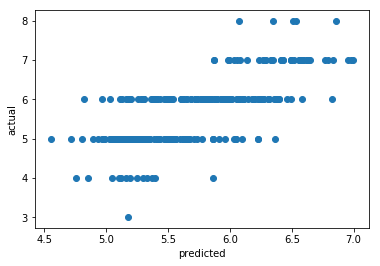

In [58]:
ridge_pred = fitted_red_models['rf'].predict(red_input_test)
plt.scatter(ridge_pred, red_quality_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [64]:
fitted_red_models['rf']

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'randomforestregressor__n_estimators': [100, 200], 'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [68]:
explained_variance_score(red_quality_test, fitted_red_models['rf'].predict(red_input_test))

0.51008110266327455